Effective February 1, 2006, before providing coverage for procedures and supplies related to Sexual Dysfunction (SD) and Erectile Dysfunction (ED), health plans are required to contact the Department of Health to confirm the eligibility of enrollees to receive coverage for such services through the Erectile Dysfunction Verification System (EDVS).
- Healthfirst must not cover Medicaid enrollees’ procedures and/or supplies related to the treatment of ED/SD without first verifying an enrollees’ sex offender status and receiving a response via the EDVS.
-	Sex offender status verification is conducted as part of the prior authorization process.
-	Providers who render services for SDED services and/or supplies without obtaining Prior-Authorization require a notice from Healthfirst, reminding them of the Prior Authorization requirements for Drugs, Supplies, and Procedures Used for Sexual or Erectile Dysfunction.

In [2]:
from google.colab import files

import pandas as pd

#Upload the CSV file

uploaded = files.upload()

#Command to upload only one CSV file

filename = next(iter(uploaded))

#Read the CSV file into a DataFrame

df = pd.read_csv(filename)

#Display the first few rows of the DataFrame

print(df.head())

Saving CAPSTONE 2025-05-07_SDED Treatment  Services Claims.csv to CAPSTONE 2025-05-07_SDED Treatment  Services Claims.csv
   claim_num_cd claim_header_status  company_cd claim_received_dt  \
0  1.010000e+11                  PD           1          1/1/2025   
1  1.010000e+11                  PD           1          1/1/2025   
2  1.010000e+11                  PD           1          1/1/2025   
3  1.010000e+11                  PD           1          1/1/2025   
4  1.010000e+11                  PD           1          1/1/2025   

   claim_ln_num claim_ln_received_dt claim_ln_service_from_dt  \
0             1             1/1/2025               12/19/2024   
1             1             1/1/2025               12/19/2024   
2             1             1/1/2025               12/19/2024   
3             1             1/1/2025               12/19/2024   
4             1             1/1/2025               12/19/2024   

  claim_ln_service_to_dt service_cd cpt_cd  ... Billing provider npi cd 

In [3]:
#Show columns to determine which columns to remove
df.columns

Index(['claim_num_cd', 'claim_header_status', 'company_cd',
       'claim_received_dt', 'claim_ln_num', 'claim_ln_received_dt',
       'claim_ln_service_from_dt', 'claim_ln_service_to_dt', 'service_cd',
       'cpt_cd', 'Claim provider parent code',
       'Claim provider parent description', 'Claim provider panel code',
       'Claim provider panel description', 'Claim provider network type code',
       'Claim provider network type desciption', 'Claim provider number code',
       'Claim provider full name', 'Claim provider npi code',
       'Claim provider federal tax id', 'Claim provider porg cd',
       'attending_npi_num_cd', 'attending_provider_full_nm',
       'rendering_npi_num_cd', 'rendering_provider_full_nm', 'prov_npi',
       'prov_name', 'Billing provider npi cd', 'Billing provider full name',
       'service_hold_cd', 'service_hold_cd_dscr', 'service_hold_tp_cd',
       'service_hold_tp_dscr', 'service_hold_stt_cd', 'COMMENT', 'DISPOSITION',
       'DISPOSITION_GROUP'],

In [4]:
#Remove fields
df = df.drop(columns=['claim_num_cd', 'claim_header_status','company_cd','claim_received_dt','claim_ln_num','claim_ln_received_dt','claim_ln_service_to_dt','service_cd','cpt_cd','Claim provider parent code','Claim provider parent description','Claim provider panel code','Claim provider panel description','Claim provider network type code','Claim provider number code','Claim provider full name','Claim provider npi code','Claim provider federal tax id','Claim provider porg cd','attending_npi_num_cd','attending_provider_full_nm','rendering_npi_num_cd','rendering_provider_full_nm','prov_npi','prov_name','Billing provider npi cd','service_hold_cd','service_hold_tp_cd','service_hold_stt_cd'])

In [ ]:
df.head(5)

,claim_ln_service_from_dt,Claim provider network type desciption,Billing provider full name,service_hold_cd_dscr,service_hold_tp_dscr,COMMENT,DISPOSITION,DISPOSITION_GROUP
0,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION
1,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,PRICE MANUALLY,Warning,NaN,NaN,NaN
2,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,"AUTH REQUIRED, NOT FOUND",Warning,NaN,NaN,NaN
3,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,PRICE THROUGH RJH,Warning,NaN,NaN,NaN
4,12/19/2024,In-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION


In [5]:
#Correct column header spelling for Claim provider network type desciption
df = df.rename(columns={'Claim provider network type desciption': 'Claim provider network type description'})
df.head(1)


,claim_ln_service_from_dt,Claim provider network type description,Billing provider full name,service_hold_cd_dscr,service_hold_tp_dscr,COMMENT,DISPOSITION,DISPOSITION_GROUP
0,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION


In [6]:
#Remove blanks (NaN) from COMMENT
df = df.dropna(subset=['COMMENT'])
df.head()

,claim_ln_service_from_dt,Claim provider network type description,Billing provider full name,service_hold_cd_dscr,service_hold_tp_dscr,COMMENT,DISPOSITION,DISPOSITION_GROUP
0,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION
4,12/19/2024,In-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION
5,12/19/2024,In-Network,STONY BROOK UNIV HOSPITAL,GDHS - DOESNT MEET LCD/NCD POL,Error,DENIED,ADD ON CODE NOT SUPPORTED,INCORRECT BILLING
9,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION
13,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,IHT-INVALID REVENUE CODE,Error,DENIED,IHT-INVALID REVENUE CODE,MISSING/INVALID CODE


In [7]:
#Remove "Out of Network" from Claim provider network type description
df = df[df['Claim provider network type description'] != 'Out-of-Network']

In [8]:
#Remove "warning" from service_hold_tp_dscr
df = df[df['service_hold_tp_dscr'] != 'warning']

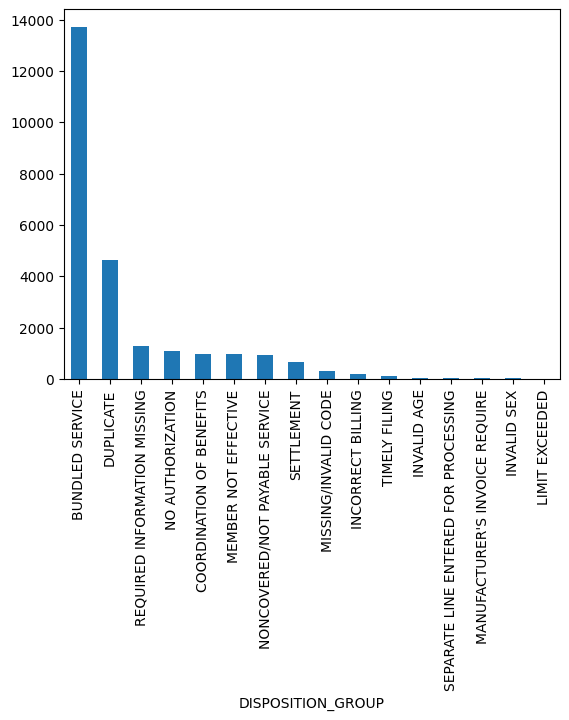

In [9]:
#Plot Disposition Groups
import matplotlib.pyplot as plt
df['DISPOSITION_GROUP'].value_counts().plot(kind='bar')
plt.show()

In [10]:
#Top 5 DISPOSITION_GROUP
df['DISPOSITION_GROUP'].value_counts().head(5)

,count
DISPOSITION_GROUP,
BUNDLED SERVICE,13708
DUPLICATE,4619
REQUIRED INFORMATION MISSING,1284
NO AUTHORIZATION,1082
COORDINATION OF BENEFITS,991


In [12]:
#Top 5 Billing provider full name
df['Billing provider full name'].value_counts().head(5)

,count
Billing provider full name,
LIJ MEDICAL CENTER,5958
NYU LANGONE HOSPITALS TISCH,2906
NYU LANGONE HOSPITAL BROOKLYN,1953
NYU LANGONE HOSPITAL LONG ISLAND,1533
PLANNED PARENTHOOD OF GREATER NEW YORK,1278


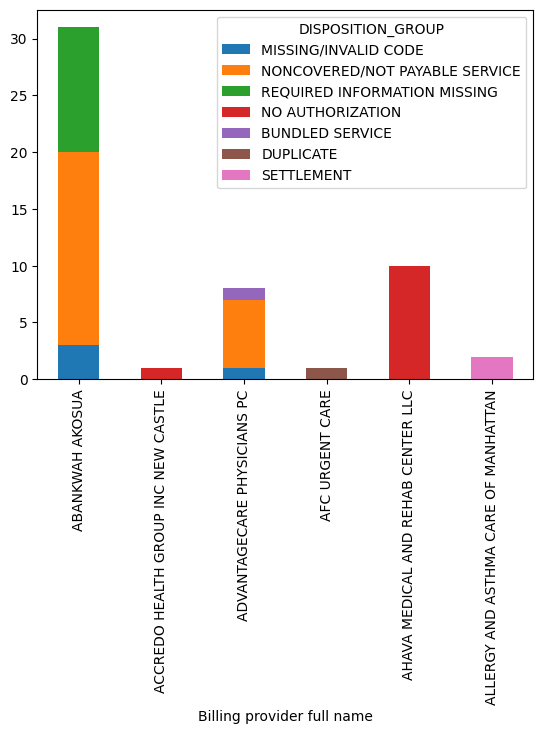

In [13]:
#Plot billing provider full name and disposition group - Limit to top ten
import matplotlib.pyplot as plt
df.groupby(['Billing provider full name', 'DISPOSITION_GROUP']).size().head(10).unstack().plot(kind='bar', stacked=True)
plt.show()

In [14]:
#Disposition_Group equals "NO AUTHORIZATION" and "NONCOVERED/NOT PAYABLE SERVICE"
df_noauth=df[(df['DISPOSITION_GROUP'] == 'NO AUTHORIZATION') | (df['DISPOSITION_GROUP'] == 'NONCOVERED/NOT PAYABLE SERVICE')]
df_noauth.head()

,claim_ln_service_from_dt,Claim provider network type description,Billing provider full name,service_hold_cd_dscr,service_hold_tp_dscr,COMMENT,DISPOSITION,DISPOSITION_GROUP
0,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION
4,12/19/2024,In-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION
9,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION
14,12/19/2024,In-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION
19,12/18/2024,In-Network,STONY BROOK UNIV HOSPITAL,SERVICE REQUIRES AUTHORIZATION,Error,DENIED,SERVICE REQUIRES AUTHORIZATION,NO AUTHORIZATION


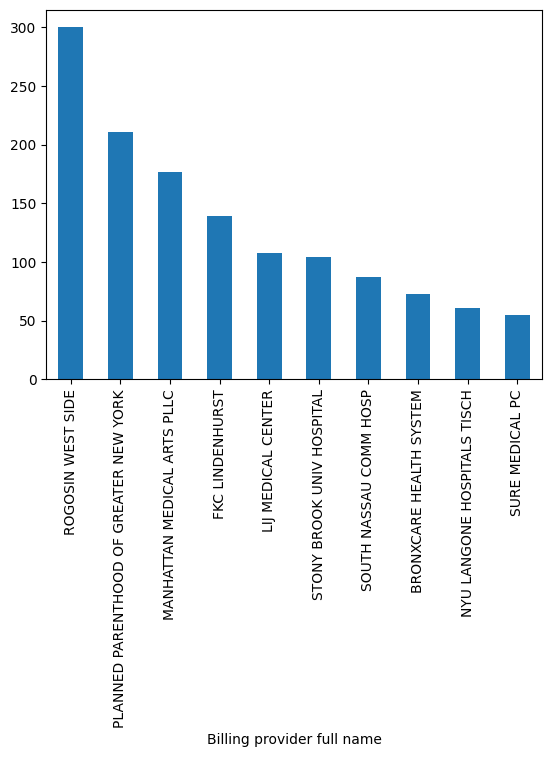

In [15]:
#Plot Billing provider full name for no auth/non-covered- limit to top ten
import matplotlib.pyplot as plt
df_noauth['Billing provider full name'].value_counts().head(10).plot(kind='bar')
plt.show()

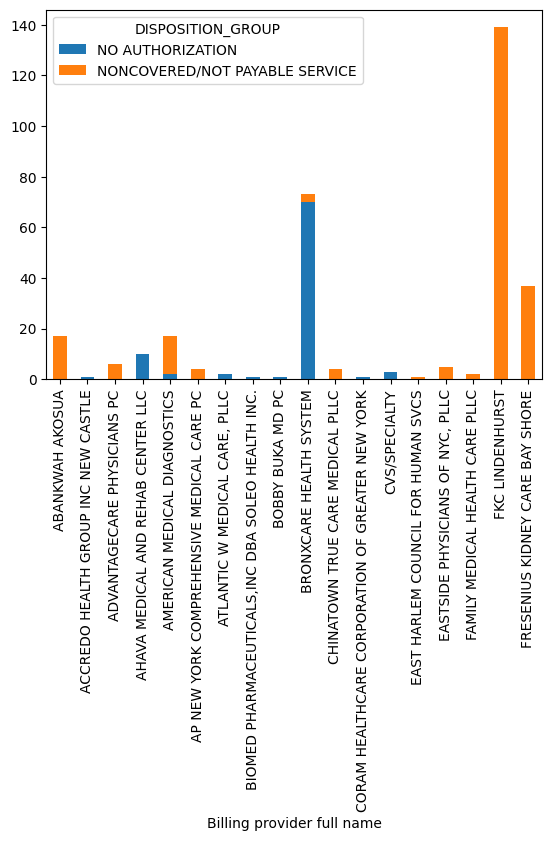

In [16]:
#Plot billing provider full name and disposition group - Limit to top ten
import matplotlib.pyplot as plt
df_noauth.groupby(['Billing provider full name', 'DISPOSITION_GROUP']).size().head(20).unstack().plot(kind='bar', stacked=True)
plt.show()

In [17]:
#Count of all providers in df_subset group
df_noauth['Billing provider full name'].nunique()

93

The following 93 providers require notice:

In [18]:
#List all providers in df_noauth group
df_noauth['Billing provider full name'].unique()

array(['STONY BROOK UNIV HOSPITAL', 'GOOD SAMARITAN HOSPITAL',
       'ST FRANCIS HOSPITAL', 'AHAVA MEDICAL AND REHAB CENTER LLC',
       'LIJ MEDICAL CENTER', 'LENOX HILL HOSPITAL',
       'JOHN T MATHER MEM HOSP', 'NORTH SHORE LIJ MEDICAL PC',
       'NAS HEALTH CARE CORP', 'NYU LANGONE ORTHOPEDIC HOSPITAL',
       'RICHMOND UNIVERSITY MEDICAL C', "ST. LUKE'S CORNWALL HOSPITAL",
       'VANTAGE MEDICAL ASSOCIATES PC', 'SCHWEIGER DERMATOLOGY, PLLC',
       'MONTEFIORE NYACK HOSPITAL', 'SB ANAESTHESIOLOGY',
       'ROGOSIN WEST SIDE', 'AMERICAN MEDICAL DIAGNOSTICS',
       'MONTEFIORE MEDICAL CENTER', 'RICHARD M SELDES, MD PC',
       'G BERLINER RANDALL', 'MANHATTAN MEDICAL ARTS PLLC',
       'NEW YORK PAIN RELIEF MEDICINE, PLLC', 'ABANKWAH AKOSUA',
       'NORTH SHORE HEMATOLOGY ONCOLOGY ASSOCIATES PC',
       'PPHP SMITHTOWN HEALTH CENTER', 'PPHP WHITE PLAINS HEALTH CENTER',
       'MONTEFIORE MOUNT VERNON', 'MAIMONIDES MEDICAL CENTER',
       'SURE MEDICAL PC', 'BRONXCARE HEALTH SY

The following groups were created to compare the # of claims denied for no auth against claims denied for other reasons by provider.

In [19]:
#Disposition_Group does not equal "NO AUTHORIZATION" and "NONCOVERED/NOT PAYABLE SERVICE"
df_auth=df[(df['DISPOSITION_GROUP'] != 'NO AUTHORIZATION') & (df['DISPOSITION_GROUP'] != 'NONCOVERED/NOT PAYABLE SERVICE')]
df_auth.head()

,claim_ln_service_from_dt,Claim provider network type description,Billing provider full name,service_hold_cd_dscr,service_hold_tp_dscr,COMMENT,DISPOSITION,DISPOSITION_GROUP
5,12/19/2024,In-Network,STONY BROOK UNIV HOSPITAL,GDHS - DOESNT MEET LCD/NCD POL,Error,DENIED,ADD ON CODE NOT SUPPORTED,INCORRECT BILLING
13,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,IHT-INVALID REVENUE CODE,Error,DENIED,IHT-INVALID REVENUE CODE,MISSING/INVALID CODE
18,12/19/2024,In-Network,STONY BROOK UNIV HOSPITAL,IHT-INVALID REVENUE CODE,Error,DENIED,IHT-INVALID REVENUE CODE,MISSING/INVALID CODE
20,12/18/2024,In-Network,STONY BROOK UNIV HOSPITAL,GDHS - DOESNT MEET LCD/NCD POL,Error,DENIED,ADD ON CODE NOT SUPPORTED,INCORRECT BILLING
30,12/19/2024,Intra-Network,STONY BROOK UNIV HOSPITAL,GDHS - DOESNT MEET LCD/NCD POL,Error,DENIED,ADD ON CODE NOT SUPPORTED,INCORRECT BILLING


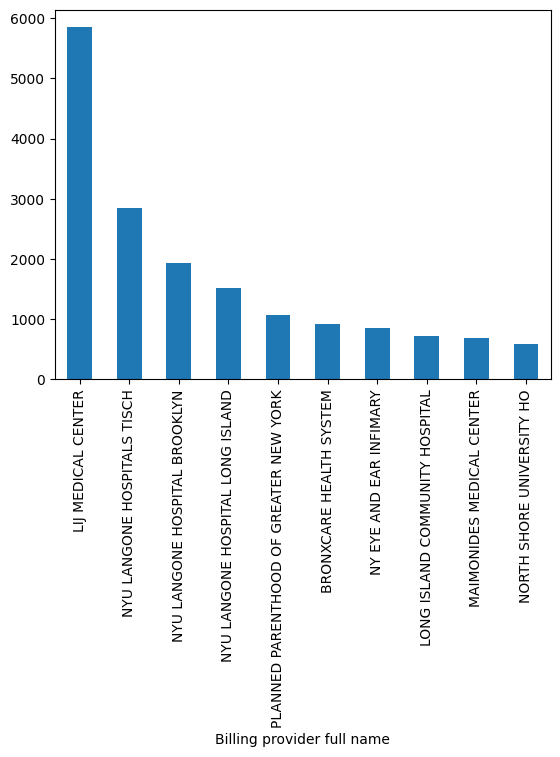

In [20]:
#Plot Billing provider full name for auth - limit to top ten
import matplotlib.pyplot as plt
df_auth['Billing provider full name'].value_counts().head(10).plot(kind='bar')
plt.show()

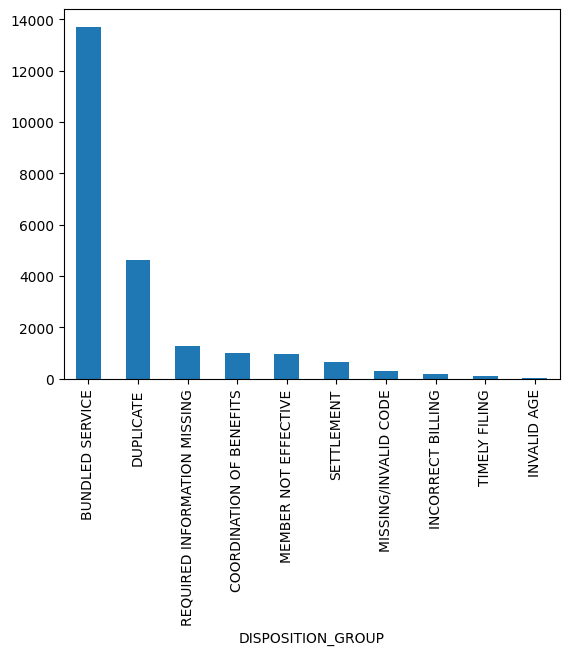

In [21]:
#Plot DISPOSITION_GROUP == AUTHORIZATION
import matplotlib.pyplot as plt
df_auth['DISPOSITION_GROUP'].value_counts().head(10).plot(kind='bar')
plt.show()

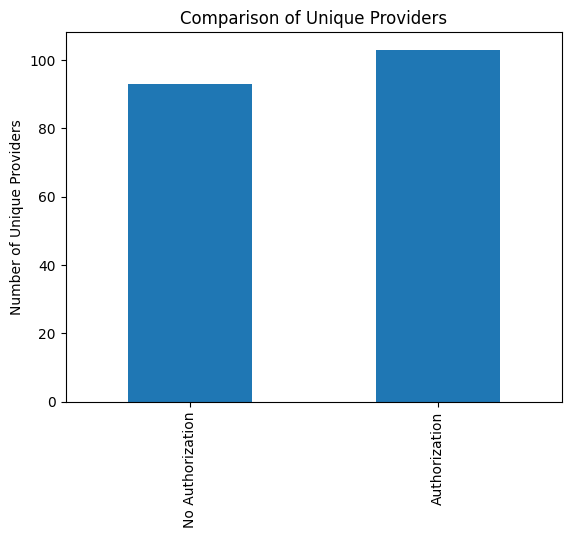

In [22]:
#Plot provs df_no auth vs df_auth
import matplotlib.pyplot as plt
import pandas as pd

#Get the unique counts
noauth_count = df_noauth['Billing provider full name'].nunique()
auth_count = df_auth['Billing provider full name'].nunique()

#Create a pandas Series for plotting
counts_series = pd.Series([noauth_count, auth_count], index=['No Authorization', 'Authorization'])

#Plot the Series
counts_series.plot(kind='bar')
plt.ylabel('Number of Unique Providers')
plt.title('Comparison of Unique Providers')
plt.show()

In [24]:
#Average percent of billing providers with no auth/non covered dispositions
df_noauth['Billing provider full name'].nunique()/df['Billing provider full name'].nunique()



0.8157894736842105

In [26]:
#Comparison of providers in df_noauth to providers in df_auth

import matplotlib.pyplot as plt
#Get the set of unique providers in each DataFrame
providers_noauth = set(df_noauth['Billing provider full name'].unique())
providers_auth = set(df_auth['Billing provider full name'].unique())

#Find providers present in df_noauth but not in df_auth
providers_only_noauth = providers_noauth - providers_auth
print(f"\nProviders only in df_noauth (No Authorization/Noncovered): {len(providers_only_noauth)}")

#Find providers present in df_auth but not in df_noauth
providers_only_auth = providers_auth - providers_noauth
print(f"Providers only in df_auth (Authorized/Other): {len(providers_only_auth)}")

#Find providers present in both DataFrames
providers_in_both = providers_noauth.intersection(providers_auth)
print(f"Providers in both df_noauth and df_auth: {len(providers_in_both)}")




Providers only in df_noauth (No Authorization/Noncovered): 11
Providers only in df_auth (Authorized/Other): 21
Providers in both df_noauth and df_auth: 82


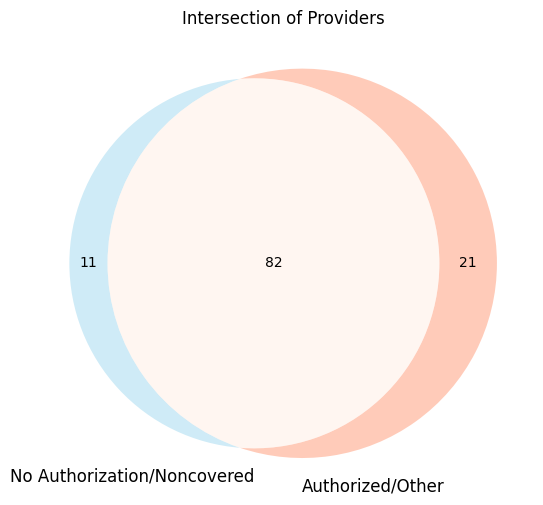

In [27]:
#Visualize the intersection and differences using Venn diagram
!pip install matplotlib-venn
from matplotlib_venn import venn2

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
venn2([providers_noauth, providers_auth], set_labels=('No Authorization/Noncovered', 'Authorized/Other'), set_colors=('skyblue', 'coral'))
plt.title('Intersection of Providers')
plt.show()


In [38]:
#Percentage of df_auth vs df_noauth for providers_in_both

import pandas as pd
import matplotlib.pyplot as plt
# Filter df_auth and df_noauth to only include providers in providers_in_both
df_auth_both = df_auth[df_auth['Billing provider full name'].isin(providers_in_both)]
df_noauth_both = df_noauth[df_noauth['Billing provider full name'].isin(providers_in_both)]

#Count the total number of claims for each provider in both categories
auth_counts = df_auth_both['Billing provider full name'].value_counts()
noauth_counts = df_noauth_both['Billing provider full name'].value_counts()

#Combine the counts into a single DataFrame
combined_counts = pd.concat([auth_counts.rename('Auth_Count'), noauth_counts.rename('NoAuth_Count')], axis=1).fillna(0)

#Calculate the total claims for each provider
combined_counts['Total_Claims'] = combined_counts['Auth_Count'] + combined_counts['NoAuth_Count']

#Calculate the percentage of no-auth claims for each provider
combined_counts['NoAuth_Percentage'] = (combined_counts['NoAuth_Count'] / combined_counts['Total_Claims']) * 100

#Calculate the average percentage of no-auth claims across all providers in both
average_noauth_percentage_in_both = combined_counts['NoAuth_Percentage'].mean()

print(f"\nAverage Percentage of No Authorization/Noncovered Claims for Providers in Both Categories: {average_noauth_percentage_in_both:.2f}%")



Average Percentage of No Authorization/Noncovered Claims for Providers in Both Categories: 28.09%


In [30]:
#Get the average by each provider of df_noauth over df

import pandas as pd
import matplotlib.pyplot as plt
# Ensure the necessary columns exist
required_columns = ['Billing provider full name', 'DISPOSITION_GROUP']
for col in required_columns:
    if col not in df.columns:
        print(f"Error: Column '{col}' not found in DataFrame. Cannot perform analysis.")
        #Exit the script or handle this case appropriately if the column is essential
        exit()

#Count the total number of dispositions for each provider in the full dataframe (df)
df_total_counts = df.groupby('Billing provider full name').size().reset_index(name='total_dispositions')

#Count the number of dispositions in df_noauth for each provider
df_noauth_counts = df_noauth.groupby('Billing provider full name').size().reset_index(name='noauth_dispositions')

#Merge the two counts
df_merged_counts = pd.merge(df_total_counts, df_noauth_counts, on='Billing provider full name', how='left').fillna(0)

#Calculate the percentage of df_noauth dispositions for each provider
df_merged_counts['percentage_noauth'] = (df_merged_counts['noauth_dispositions'] / df_merged_counts['total_dispositions']) * 100

#Calculate the average percentage across all providers
average_percentage_noauth_per_provider = df_merged_counts['percentage_noauth'].mean()

print(f"\nAverage percentage of df_noauth dispositions per provider: {average_percentage_noauth_per_provider:.2f}%")



Average percentage of df_noauth dispositions per provider: 29.85%


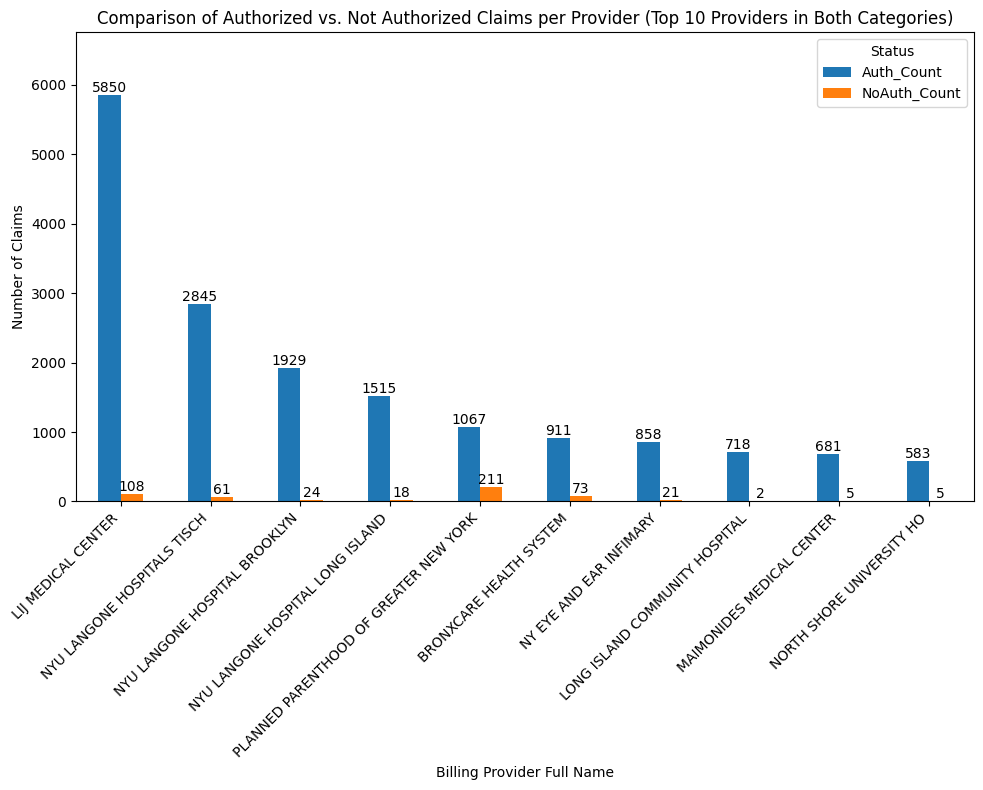

In [32]:
#Comparison of authorized vs not authorized by provider in both

import pandas as pd
import matplotlib.pyplot as plt
#Filter df_auth and df_noauth to only include providers in providers_in_both
df_auth_both = df_auth[df_auth['Billing provider full name'].isin(providers_in_both)]
df_noauth_both = df_noauth[df_noauth['Billing provider full name'].isin(providers_in_both)]

#Count the total number of claims for each provider in each category
auth_counts = df_auth_both['Billing provider full name'].value_counts().reset_index()
auth_counts.columns = ['Billing provider full name', 'Auth_Count']

noauth_counts = df_noauth_both['Billing provider full name'].value_counts().reset_index()
noauth_counts.columns = ['Billing provider full name', 'NoAuth_Count']

#Combine the counts into a single DataFrame, merging on the provider name
combined_counts = pd.merge(auth_counts, noauth_counts, on='Billing provider full name', how='outer').fillna(0)

#Plot the comparison of authorized vs. not authorized claims per provider in both categories
#Sort by the total number of claims for better visualization (optional)
combined_counts['Total_Claims'] = combined_counts['Auth_Count'] + combined_counts['NoAuth_Count']
combined_counts = combined_counts.sort_values(by='Total_Claims', ascending=False)

#Limit to a reasonable number of providers for plotting, e.g., the top 10
top_n = 10
plot_data = combined_counts.head(top_n)

fig, ax = plt.subplots(figsize=(10, 8)) #Adjust figure size for vertical stretching
plot_data.set_index('Billing provider full name')[['Auth_Count', 'NoAuth_Count']].plot(kind='bar', stacked=False, ax=ax)

plt.ylabel('Number of Claims')
plt.title(f'Comparison of Authorized vs. Not Authorized Claims per Provider (Top {top_n} Providers in Both Categories)')
plt.xlabel('Billing Provider Full Name')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()

#Add line values to the bars
for c in ax.containers:
    #Customize the label to display integer values
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

# Adjust y-axis limits to make space for the labels
ax.set_ylim(0, ax.get_ylim()[1] * 1.1) #Increase y-axis upper limit by 10%

plt.show()


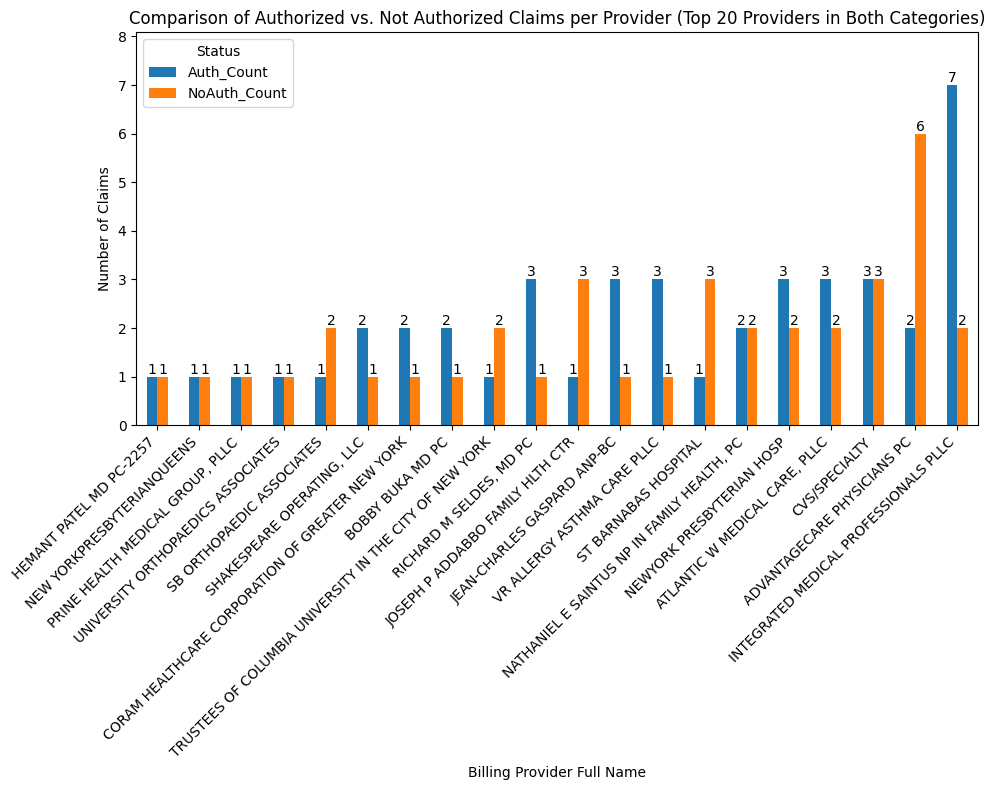

In [37]:
#Comparison of authorized vs not authorized by provider in both - bottom 20

import pandas as pd
import matplotlib.pyplot as plt
# Filter df_auth and df_noauth to only include providers in providers_in_both
df_auth_both = df_auth[df_auth['Billing provider full name'].isin(providers_in_both)]
df_noauth_both = df_noauth[df_noauth['Billing provider full name'].isin(providers_in_both)]

#Count the total number of claims for each provider in each category
auth_counts = df_auth_both['Billing provider full name'].value_counts().reset_index()
auth_counts.columns = ['Billing provider full name', 'Auth_Count']

noauth_counts = df_noauth_both['Billing provider full name'].value_counts().reset_index()
noauth_counts.columns = ['Billing provider full name', 'NoAuth_Count']

#Combine the counts into a single DataFrame, merging on the provider name
combined_counts = pd.merge(auth_counts, noauth_counts, on='Billing provider full name', how='outer').fillna(0)

#Plot the comparison of authorized vs. not authorized claims per provider in both categories
#Sort by the total number of claims for better visualization (optional)
combined_counts['Total_Claims'] = combined_counts['Auth_Count'] + combined_counts['NoAuth_Count']
combined_counts = combined_counts.sort_values(by='Total_Claims')

#Limit to a reasonable number of providers for plotting, e.g., bottom 20 (remove "ascending")
bot_n = 20
plot_data = combined_counts.head(top_n)

fig, ax = plt.subplots(figsize=(10, 8)) #Adjust figure size for vertical stretching
plot_data.set_index('Billing provider full name')[['Auth_Count', 'NoAuth_Count']].plot(kind='bar', stacked=False, ax=ax)

plt.ylabel('Number of Claims')
plt.title(f'Comparison of Authorized vs. Not Authorized Claims per Provider (Top {bot_n} Providers in Both Categories)')
plt.xlabel('Billing Provider Full Name')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status')
plt.tight_layout()

#Add line values to the bars
for c in ax.containers:
    #Customize the label to display integer values
    labels = [int(v.get_height()) if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge')

#Adjust y-axis limits to make space for the labels
ax.set_ylim(0, ax.get_ylim()[1] * 1.1) #Increase y-axis upper limit by 10%

plt.show()


Conclusion:
- 93 providers billed for SDED services without obtaining Prior-Authorization
- Notice must be sent to these providers reminding them that these services require prior-authorization before services are rendered.
- 82 providers received denials for both unauthorized and authorized services
  - The average percent of unauthorized to authorized services per provider is 30%
  - 55% of these providers are over the 30% average; however, these providers billed for less that 2% total denied claim lines.
  - The average denied claims for unauthorized services for the top 10 billing providers is below 20%.


Next steps:
- Send written communication to billing providers
- Monitor billing providers to look for upward/downward trends
- Have conversations with providers who trend upwards


